In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer, LancasterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag, pos_tag_sents

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer  #criar tf-idf

import string
import wordcloud
import pandas as pd
from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt

In [6]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("tagsets")
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/luankaio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/luankaio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package tagsets to /home/luankaio/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to /home/luankaio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/luankaio/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /home/luankaio/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/luankaio/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [7]:
spam = pd.read_csv('spam.csv')
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
previ = spam['Message']
classe = spam['Category']

In [9]:
vetorizador = TfidfVectorizer()
previsores = vetorizador.fit_transform(previ) 

In [10]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3)


In [11]:
floresta = RandomForestClassifier(n_estimators=500)
floresta.fit(X_treinamento, y_treinamento) 

RandomForestClassifier(n_estimators=500)

In [13]:
previsoes = floresta.predict(X_teste)


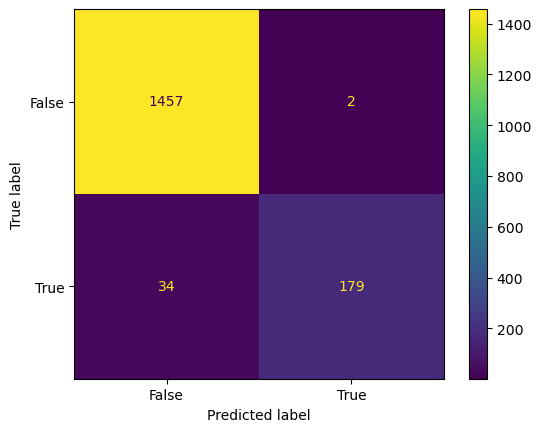

0.9784688995215312

In [14]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
confusion_matrix(y_teste, previsoes)
cm =confusion_matrix(y_teste, previsoes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()
accuracy_score(y_teste, previsoes)